<a href="https://colab.research.google.com/github/MingChin100/python-ML/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test)= load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
trans = [
    "tshirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal",
    "shirt",
    "snaker",
    "bag",
    "ankle boot"
]

ans: 9


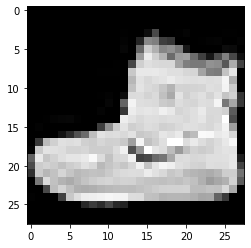

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
      Dense(128, activation="relu", input_dim=784),
      Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [ ]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.5933 - accuracy: 0.7963 - val_loss: 0.4567 - val_accuracy: 0.8400
Epoch 2/50
270/270 - 1s - loss: 0.4295 - accuracy: 0.8516 - val_loss: 0.4037 - val_accuracy: 0.8577
Epoch 3/50
270/270 - 1s - loss: 0.3898 - accuracy: 0.8636 - val_loss: 0.3773 - val_accuracy: 0.8637
Epoch 4/50
270/270 - 1s - loss: 0.3636 - accuracy: 0.8740 - val_loss: 0.3704 - val_accuracy: 0.8692
Epoch 5/50
270/270 - 1s - loss: 0.3402 - accuracy: 0.8802 - val_loss: 0.3570 - val_accuracy: 0.8687
Epoch 6/50
270/270 - 1s - loss: 0.3242 - accuracy: 0.8848 - val_loss: 0.3436 - val_accuracy: 0.8777
Epoch 7/50
270/270 - 1s - loss: 0.3136 - accuracy: 0.8884 - val_loss: 0.3437 - val_accuracy: 0.8762
Epoch 8/50
270/270 - 1s - loss: 0.3000 - accuracy: 0.8920 - val_loss: 0.3352 - val_accuracy: 0.8798
Epoch 9/50
270/270 - 1s - loss: 0.2900 - accuracy: 0.8945 - val_loss: 0.3370 - val_accuracy: 0.8798
Epoch 10/50
270/270 - 1s - loss: 0.2801 - accuracy: 0.8986 - val_loss: 0.3177 - val_accuracy: 0.8825

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8848


[0.32969340682029724, 0.8848000168800354]

In [ ]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(i) for i in trans],
       columns=["{}(預測)".format(i) for i in trans])

,tshirt(預測),trouser(預測),pullover(預測),dress(預測),coat(預測),sandal(預測),shirt(預測),snaker(預測),bag(預測),ankle boot(預測)
tshirt(真實),828,2,18,22,1,2,122,0,5,0
trouser(真實),0,979,1,15,2,0,3,0,0,0
pullover(真實),16,1,801,11,94,0,76,0,1,0
dress(真實),22,12,13,885,26,1,36,0,5,0
coat(真實),0,2,81,35,803,0,77,0,2,0
sandal(真實),0,0,0,1,0,958,0,20,2,19
shirt(真實),100,2,88,27,53,0,725,0,5,0
snaker(真實),0,0,0,0,0,20,0,948,0,32
bag(真實),7,0,5,3,5,2,11,4,963,0
ankle boot(真實),0,0,0,0,0,4,1,37,0,958


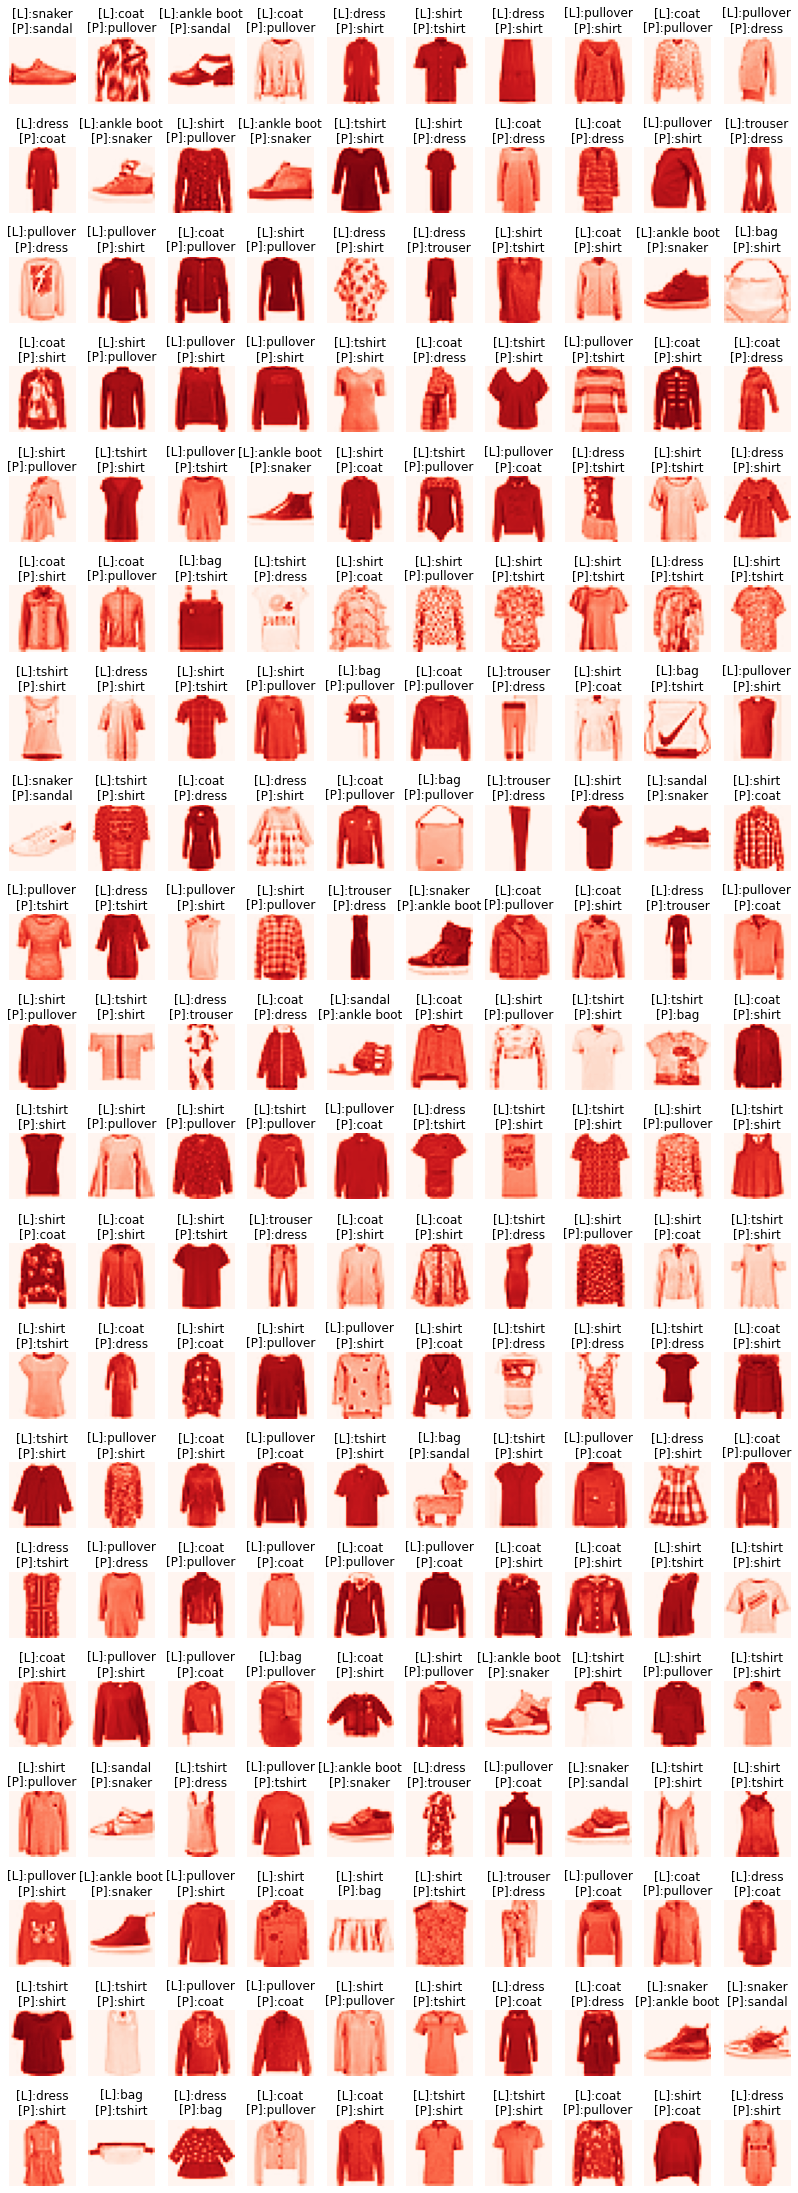

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0][:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], trans[y_test[d]], trans[pre[d]]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Reds")